# Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv("heart.csv")
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


#### age : age of the patient  
#### sex : sex of the patient
#### cp : chest Pain type

Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)
#### chol : cholestoral in mg/dl fetched via BMI sensor
#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### rest_ecg : resting electrocardiographic results

Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved
#### exang : exercise induced angina (1 = yes; 0 = no)
#### oldpeak : previous peak
#### slp : slope
#### caa : number of major vessels (0-3)
#### thall : thal rate
#### output : 0 = less chance of heart attack, 1 = more chance of heart attack

# Data Exploration

#### General One Person Data 

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
print(data.shape)
data.iloc[2,:]

(303, 14)


age          41.0
sex           0.0
cp            1.0
trtbps      130.0
chol        204.0
fbs           0.0
restecg       0.0
thalachh    172.0
exng          0.0
oldpeak       1.4
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 2, dtype: float64

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
for i in ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']:
    print(i, "    ", data[i].unique())
    
data.output.sum()

sex      [1 0]
cp      [3 2 1 0]
fbs      [1 0]
restecg      [0 1 2]
exng      [0 1]
slp      [0 2 1]
caa      [0 2 1 3 4]
thall      [1 2 3 0]
output      [1 0]


165

#### We need to onehotencode cp, restecg, caa

<AxesSubplot:xlabel='output', ylabel='Count'>

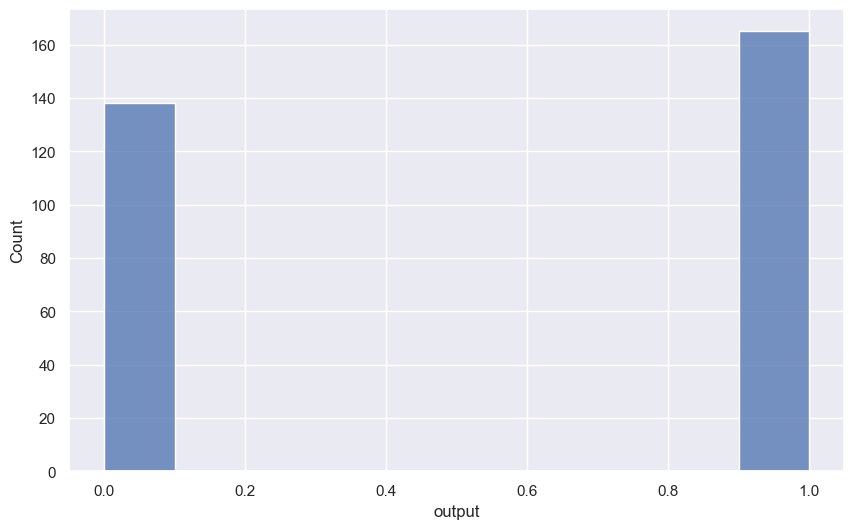

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x=data.output)

#### Total 303 people went to Diagnosis

# Splitting Data into Train and Test data

In [8]:
y = data.output
X = data.drop("output", axis =1)

In [9]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


# Encoding

In [10]:
lst = ['cp', 'restecg']

for i in lst:
    for j in X_train[i].unique():
        
        dummie = X_train[i] == j
        X_train[i + "_" + str(j)] = dummie * 1
        
        dummie = X_test[i] == j
        X_test[i + "_" + str(j)] = dummie * 1
        
X_train = X_train.drop(lst, axis = 1)
X_test = X_test.drop(lst, axis = 1)

In [11]:
X_train.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'cp_1', 'cp_2', 'cp_0', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2'],
      dtype='object')

In [12]:
X_train = X_train[['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
                   'slp', 'caa', 'thall', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
                   'restecg_1', 'restecg_2']]
X_test = X_test[['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
                   'slp', 'caa', 'thall', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
                   'restecg_1', 'restecg_2']]

we can remove 'cp_0', 'restecg_0', since they are duplicates

In [13]:
# ll = ['cp_0', 'restecg_0']
ll = 'restecg_0'

X_train = X_train.drop(ll, axis = 1)
X_test = X_test.drop(ll, axis = 1)

# Heat map

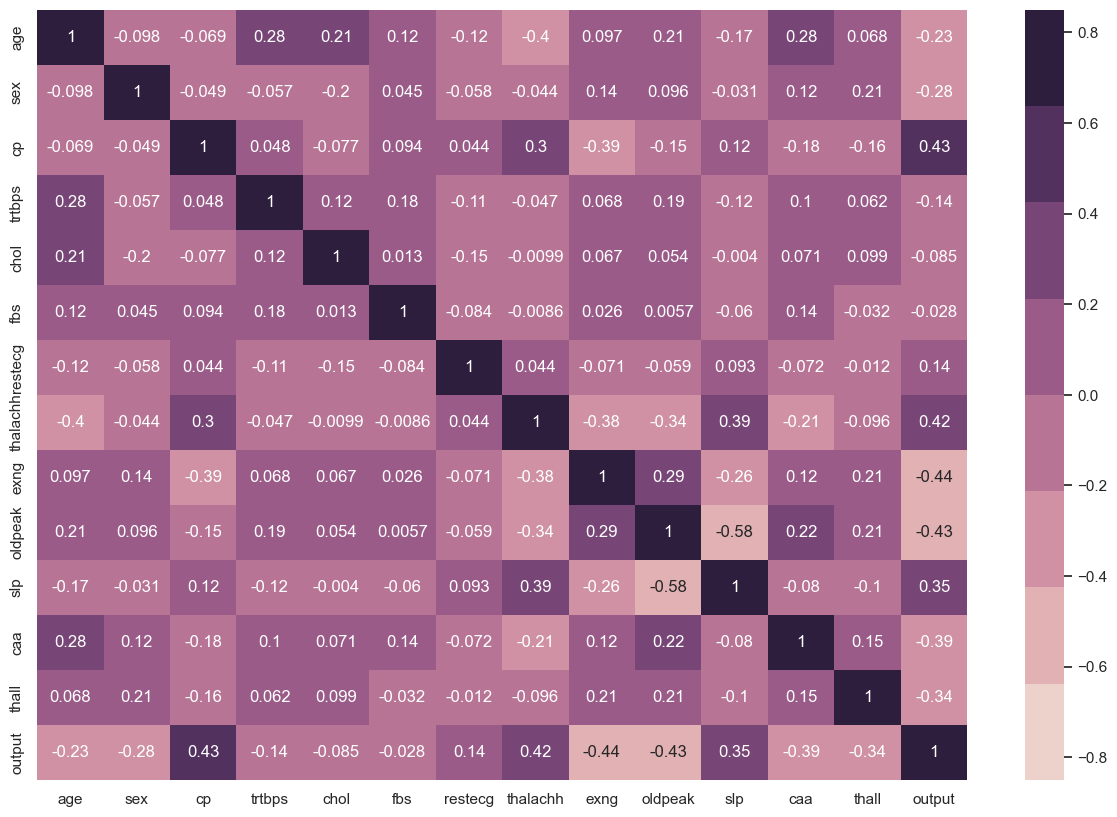

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap = sns.cubehelix_palette(8), annot = True, vmin=-0.85, vmax=0.85)
plt.savefig('images/before.png')

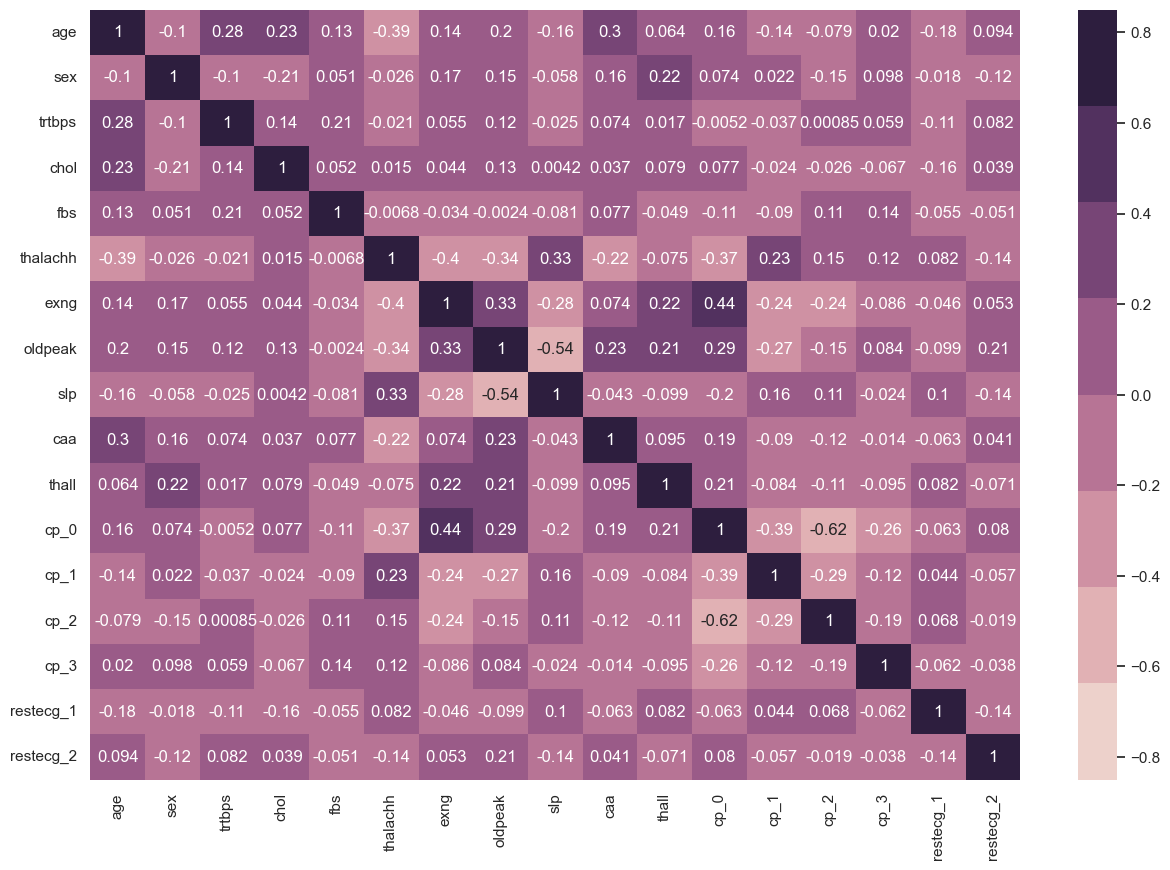

In [15]:
# cmap = sns.cubehelix_palette(8) ,  'YlGnBu'

plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), cmap = sns.cubehelix_palette(8), annot = True, vmin=-0.85, vmax=0.85)
plt.savefig('images/before.png')

#### Everything is fine

In [16]:
df = X_train.iloc[:,[0,2,3,5,7]]
df["output"] = y_train
df.head()

C:\Users\Addanki Balaji\AppData\Local\Temp\ipykernel_16928\2713001613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["output"] = y_train


,age,trtbps,chol,thalachh,oldpeak,output
287,57,154,232,164,0.0,0
282,59,126,218,134,2.2,0
197,67,125,254,163,0.2,0
158,58,125,220,144,0.4,1
164,38,138,175,173,0.0,1


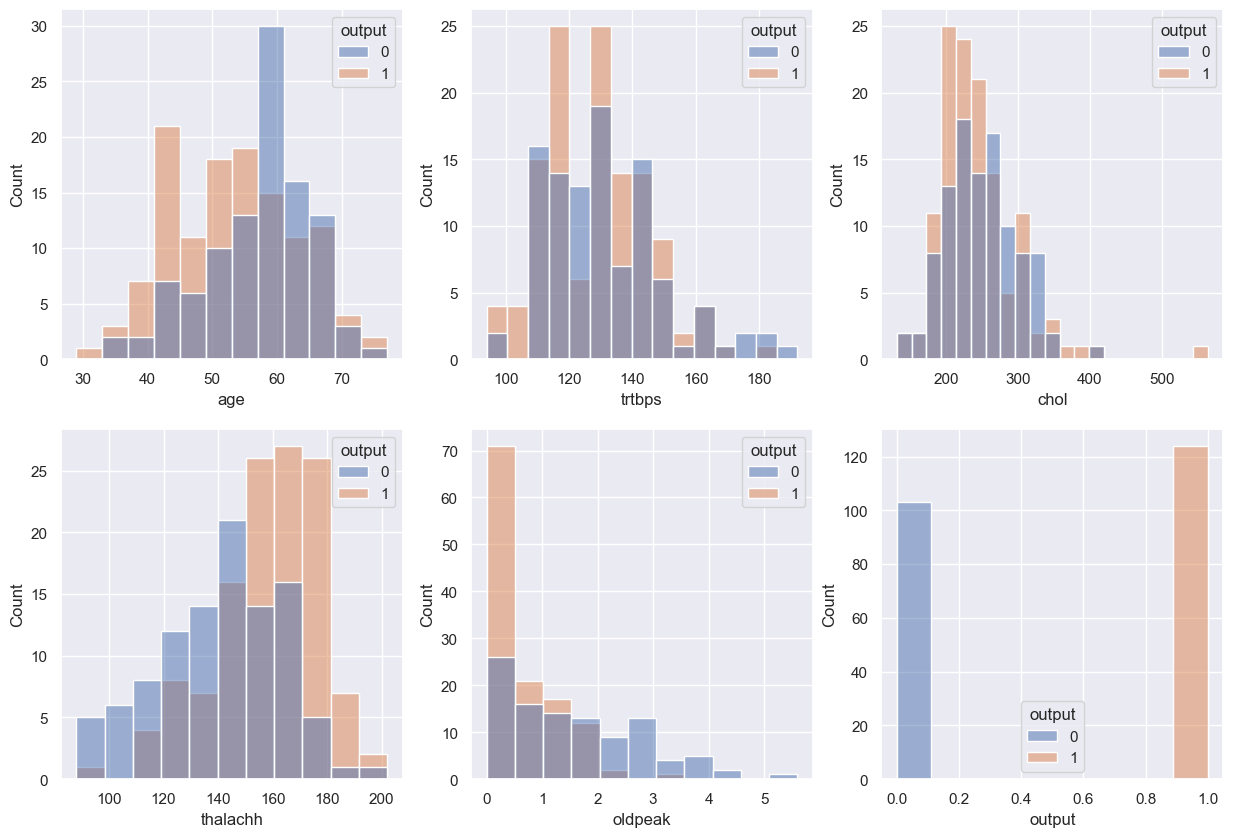

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
a = 0
for i in range(2):
    for j in range(3):
        sns.histplot(df, x=df.columns[a], element = "bars", ax = ax[i,j], hue = "output" )
        a = a+1
        
plt.savefig('images/histplot.png')

C:\Users\Addanki Balaji\AppData\Local\Temp\ipykernel_16928\4262088498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["output"] = y_train


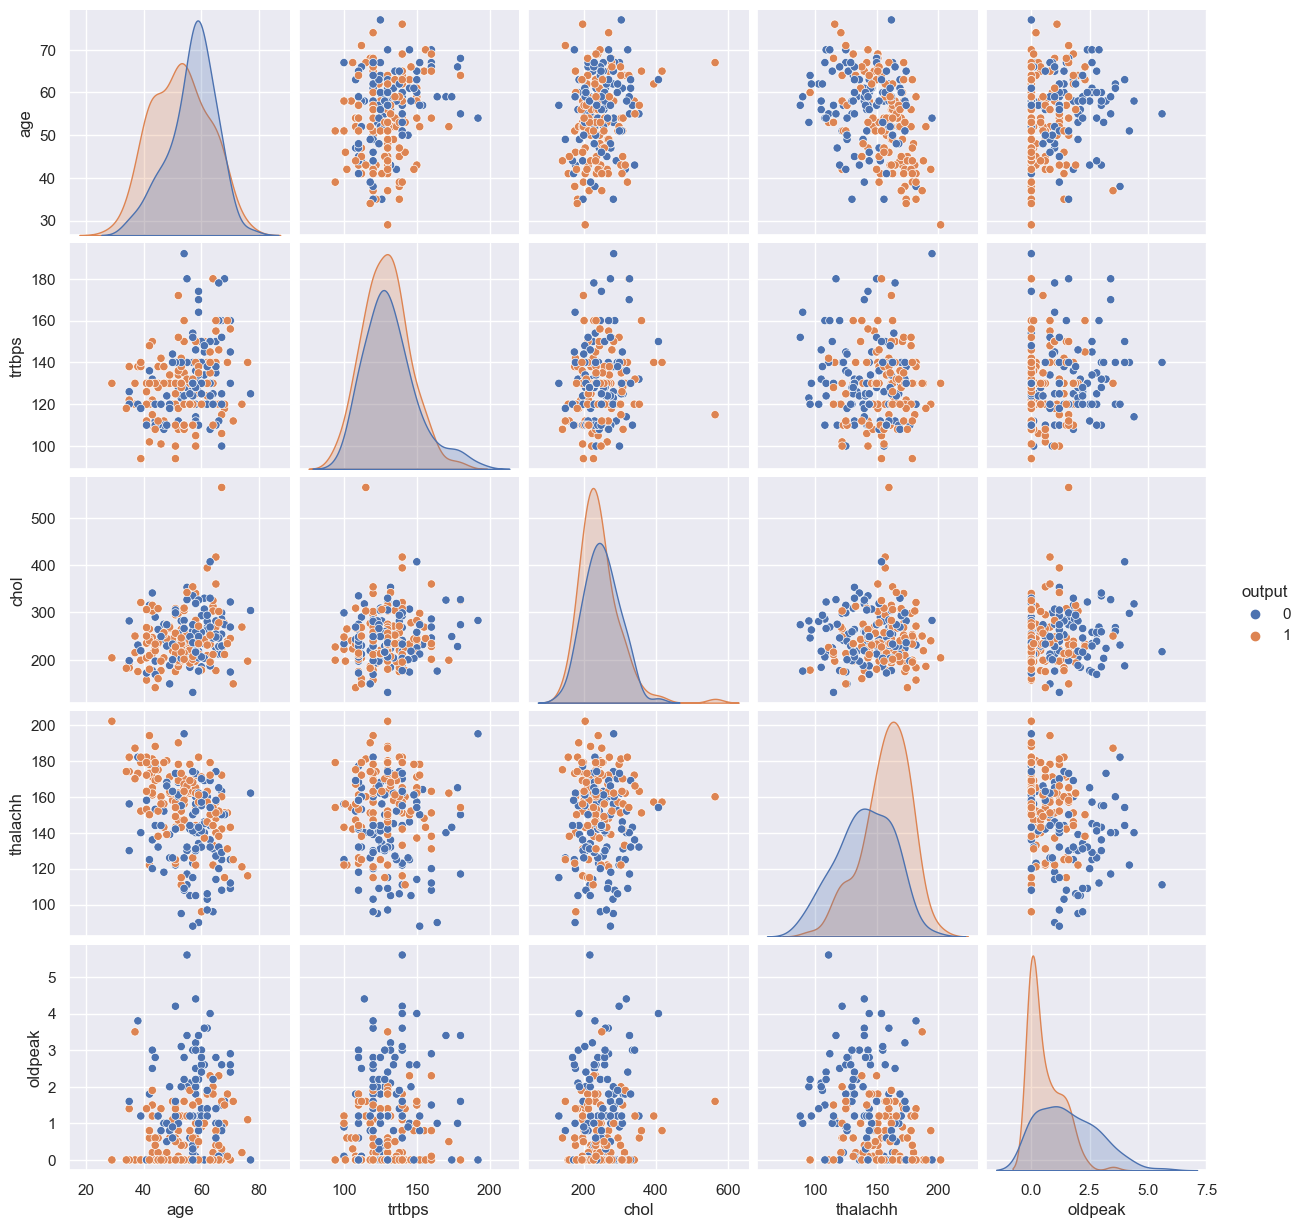

In [18]:
df = X_train.iloc[:,[0,2,3,5,7]]
df["output"] = y_train
sns.pairplot(df, hue="output")
plt.savefig('images/pairplot.png')

#### There are certainly some patterns to recognize Heart Attack chance is high or low, based on the above 2 plots.

# Scaling 

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_chenged = scalar.fit_transform(X_train)
X_test_chenged = scalar.transform(X_test)

# Modelling

In [20]:
from sklearn import metrics

def accuracy_metric(a, b, c):
    print(a, " accuracy = ", 100.0 * metrics.accuracy_score(b,c) )
    print(metrics.classification_report(b,c))
    print("_______________________________________________________________________")

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def modelling(X_train, X_test, y_train, Y_test):
    
    model = LogisticRegression(random_state = 0)
    model.fit(X_train,y_train)
    accuracy_metric("LogisticRegression Test  ", y_test, model.predict(X_test) )
    accuracy_metric("LogisticRegression Train  ", y_train, model.predict(X_train))
    
    
    model = LinearSVC(random_state =2)
    model.fit(X_train,y_train)
    accuracy_metric("LinearSVC Test  ", y_test, model.predict(X_test) )
    accuracy_metric("LinearSVC Train  ", y_train, model.predict(X_train))
    
    
    model = GaussianNB()
    model.fit(X_train,y_train)
    accuracy_metric("GaussianNB Test  ", y_test, model.predict(X_test) )
    accuracy_metric("GaussianNB Train  ", y_train, model.predict(X_train))
    
    
    model = DecisionTreeClassifier(min_samples_leaf=7, random_state = 2, criterion = "entropy")
    model.fit(X_train,y_train)
    accuracy_metric("DecisionTree Test  ", y_test, model.predict(X_test) )
    accuracy_metric("DecisionTree Train  ", y_train, model.predict(X_train))
    
    
    model = RandomForestClassifier(random_state = 2, min_samples_split=8, n_estimators = 400, criterion = "gini")
    model.fit(X_train,y_train)
    accuracy_metric("RandomForest Test  ", y_test, model.predict(X_test) )
    accuracy_metric("RandomForest Train  ", y_train, model.predict(X_train))
    
    
    model = KNeighborsClassifier(p = 2, n_neighbors = 5)
    model.fit(X_train,y_train)
    accuracy_metric("KNeighbors Test  ", y_test, model.predict(X_test) )
    accuracy_metric("KNeighbors Train  ", y_train, model.predict(X_train))

In [22]:
modelling(X_train_chenged, X_test_chenged, y_train, y_test)

LogisticRegression Test    accuracy =  85.52631578947368
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76

_______________________________________________________________________
LogisticRegression Train    accuracy =  85.90308370044053
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       103
           1       0.85      0.90      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227

_______________________________________________________________________
LinearSVC Test    accuracy =  85.52631578947368
              precision    recall  f1-s

In [23]:
modelling(X_train, X_test, y_train, y_test)

C:\Users\Addanki Balaji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Addanki Balaji\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression Test    accuracy =  86.8421052631579
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.84      0.93      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76

_______________________________________________________________________
LogisticRegression Train    accuracy =  84.58149779735683
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       103
           1       0.84      0.88      0.86       124

    accuracy                           0.85       227
   macro avg       0.85      0.84      0.84       227
weighted avg       0.85      0.85      0.85       227

_______________________________________________________________________
LinearSVC Test    accuracy =  85.52631578947368
              precision    recall  f1-sc

#### GaussianNB & LogisticRegression gave good reselts with 88.157% accuracy

# Final Model

In [24]:
finalmodel = GaussianNB()
finalmodel.fit(X_train,y_train)

GaussianNB()

# Creating Pickel File
#### To store final model

In [25]:
import pickle

# create a pickle file and name it anything and open it in write bites mode
file = open('model.pkl', 'wb')

# now put the model in the pickle file
pickle.dump(finalmodel, file)

file.close()

# Checking whether it worked or not

In [26]:
savedmodel = open('model.pkl','rb')
model = pickle.load(savedmodel)
savedmodel.close()

In [27]:
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [28]:
lst = [[57,1,154,232,0,164,0,0.0,2,1,2,0,1,0,0,0,0]]

In [29]:
result = model.predict(lst)
result

C:\Users\Addanki Balaji\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
result[0]

1

In [31]:
result[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
accuracy_metric("", y_test, pred)

# Sample input to model.predict

In [ ]:
X_test.columns

In [ ]:
X_train.head()

In [ ]:
X_train.shape